# 01 - Data Exploration (EDA)

This notebook contains exploratory data analysis for the movie revenue prediction project.

## Objectives:
- Load and examine the dataset
- Identify data types and missing values
- Analyze distributions and relationships
- Detect outliers and anomalies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../data/raw/movies_dataset_revenue.csv')

# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset shape: (11263, 22)

First 5 rows:


,id,title,release_date,budget,revenue,runtime,rating,vote_count,popularity,genres,...,director,cast,keywords,original_language,collection,poster_brightness,poster_saturation,poster_dom_r,poster_dom_g,poster_dom_b
0,2133,The Perfect Storm,2000-06-29,130000000,328718434,130,6.478,2497,3.4497,"Drama, Adventure, Action",...,Wolfgang Petersen,"George Clooney, Mark Wahlberg, Diane Lane, Joh...","based on novel or book, natural disaster, u.s....",en,NaN,70.23,46.01,65.0,62.0,62.0
1,8871,How the Grinch Stole Christmas,2000-11-17,123000000,345800000,105,6.784,8162,7.1169,"Family, Comedy, Fantasy",...,Ron Howard,"Jim Carrey, Taylor Momsen, Jeffrey Tambor, Chr...","new love, based on novel or book, holiday, chr...",en,NaN,157.19,130.06,96.0,119.0,136.0
2,2655,What Lies Beneath,2000-07-21,100000000,291420351,130,6.431,1979,3.4110,"Drama, Horror, Mystery, Thriller",...,Robert Zemeckis,"Michelle Pfeiffer, Harrison Ford, Diana Scarwi...","lake, therapist, haunted house, haunting, susp...",en,NaN,215.60,56.41,171.0,202.0,215.0
3,36657,X-Men,2000-07-13,75000000,296339527,104,7.010,12002,0.4508,"Adventure, Action, Science Fiction",...,Bryan Singer,"Hugh Jackman, Patrick Stewart, Ian McKellen, F...","superhero, mutant, based on comic, superhuman",en,X-Men Collection,87.53,54.47,78.0,78.0,76.0
4,3981,What Women Want,2000-12-15,70000000,374100000,127,6.446,4279,5.3781,"Comedy, Romance",...,Nancy Meyers,"Mel Gibson, Helen Hunt, Marisa Tomei, Alan Ald...","telepathy, romcom, womanizer, single father, s...",en,NaN,130.82,77.85,124.0,105.0,94.0


In [2]:
# Data types and missing values
print("Data Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nCount zero for budget:")
print(df[df['budget'] == 0].shape[0])
print("\nCount zero for revenue  :")
print(df[df['revenue'] == 0].shape[0])
print("\nCount zero for runtime  :")
print(df[df['runtime'] == 0].shape[0])

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11263 entries, 0 to 11262
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    11263 non-null  int64  
 1   title                 11263 non-null  object 
 2   release_date          11263 non-null  object 
 3   budget                11263 non-null  int64  
 4   revenue               11263 non-null  int64  
 5   runtime               11263 non-null  int64  
 6   rating                11263 non-null  float64
 7   vote_count            11263 non-null  int64  
 8   popularity            11263 non-null  float64
 9   genres                11261 non-null  object 
 10  production_companies  11047 non-null  object 
 11  production_countries  11209 non-null  object 
 12  director              11263 non-null  object 
 13  cast                  11246 non-null  object 
 14  keywords              9772 non-null   object 
 15  original

In [3]:
# Statistical summary
df.describe()

,id,budget,revenue,runtime,rating,vote_count,popularity,poster_brightness,poster_saturation,poster_dom_r,poster_dom_g,poster_dom_b
count,1.126300e+04,1.126300e+04,1.126300e+04,11263.000000,11263.000000,11263.000000,11263.000000,11261.000000,11261.000000,11261.000000,11261.000000,11261.000000
mean,2.935030e+05,1.843285e+07,5.371275e+07,107.491610,6.344785,1367.449969,2.314489,133.139690,101.907995,118.600924,106.344019,98.741053
std,3.239561e+05,3.728179e+07,1.464279e+08,21.582131,0.895203,3005.334490,3.042083,50.783646,46.485400,51.747984,48.738253,50.127448
min,1.200000e+01,0.000000e+00,1.000000e+00,0.000000,1.672000,10.000000,0.014300,8.090000,0.000000,3.000000,1.000000,1.000000
25%,2.280700e+04,0.000000e+00,1.073244e+06,94.000000,5.809500,68.000000,0.629650,93.220000,67.080000,78.000000,68.000000,58.000000
50%,1.498930e+05,3.200000e+06,6.699197e+06,104.000000,6.400000,276.000000,1.312600,134.660000,99.710000,117.000000,103.000000,94.000000
75%,4.843670e+05,2.000000e+07,3.708509e+07,118.000000,6.970000,1193.500000,2.901000,173.870000,134.070000,158.000000,143.000000,135.000000
max,1.357633e+06,4.899000e+08,2.923706e+09,367.000000,9.048000,38921.000000,55.487000,248.670000,248.270000,248.000000,243.000000,243.000000


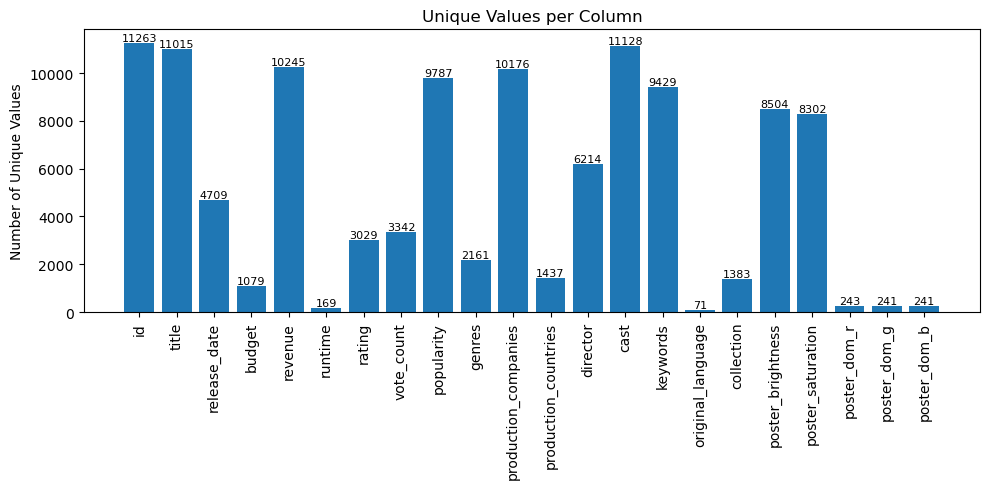

In [4]:
# Check unique values in categorical columns
unique_counts = df.nunique()

plt.figure(figsize=(10, 5))
bars = plt.bar(unique_counts.index, unique_counts.values)
plt.xticks(rotation=90)
plt.ylabel("Number of Unique Values")
plt.title("Unique Values per Column")

for i, v in enumerate(unique_counts.values):
    plt.text(
        i,                # x
        v,                # y
        str(v),           # text
        ha='center',      # center horizontally
        va='bottom',      # place text above the bar
        fontsize=8
    )

plt.tight_layout()
plt.show()

**Key Insights:**
- The dataset contains varying levels of cardinality across features
- High cardinality columns (like movie titles) may require special encoding techniques
- Lower cardinality categorical features can be one-hot encoded for modeling

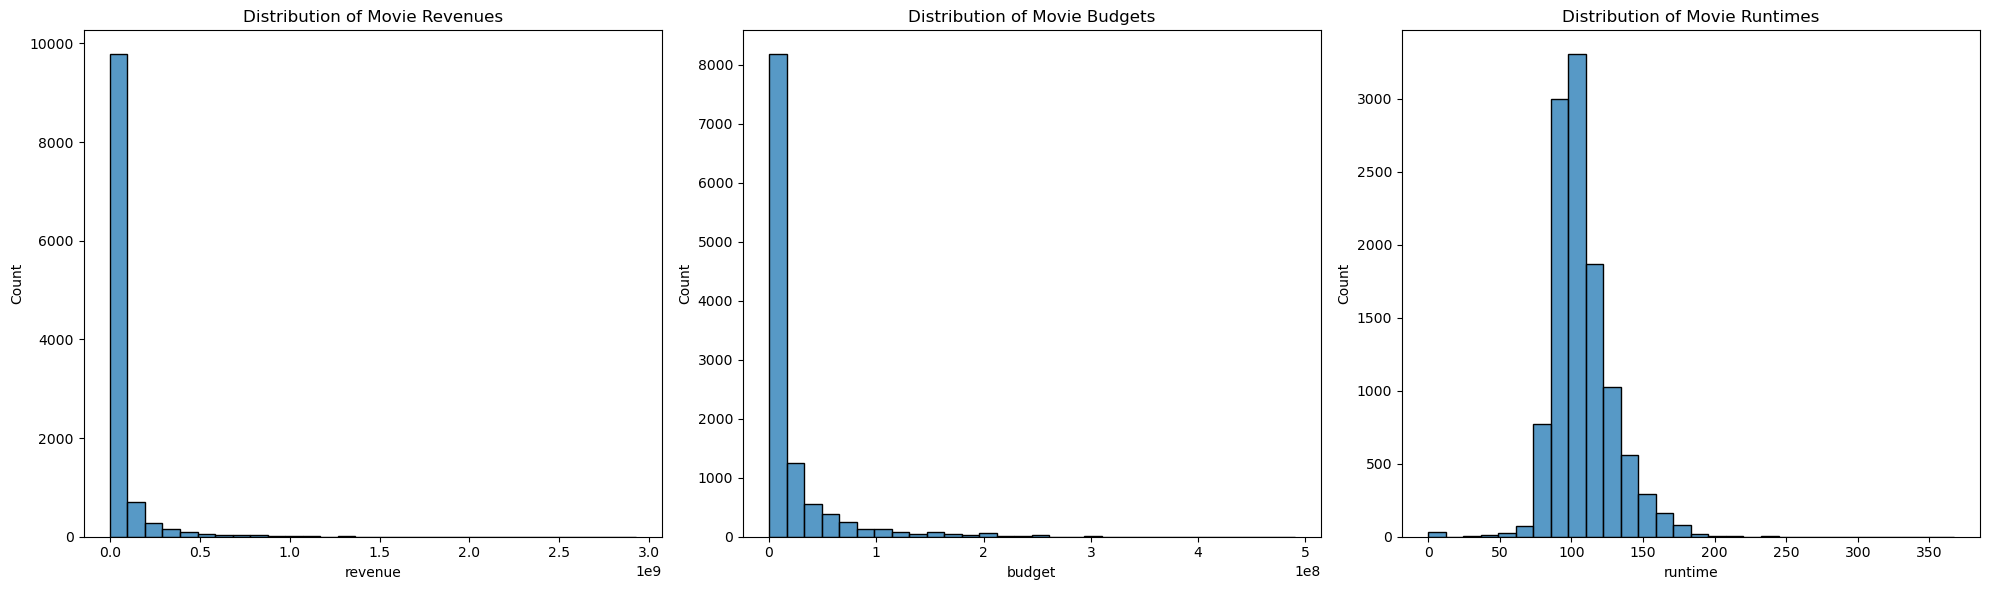

In [5]:
# Visualize distributions
plt.figure(figsize=(20, 6))

# Distribution of movie revenues
plt.subplot(1, 3, 1)
sns.histplot(df['revenue'], bins=30)
plt.title('Distribution of Movie Revenues')

# Distribution of movie budgets
plt.subplot(1, 3, 2)
sns.histplot(df['budget'], bins=30)
plt.title('Distribution of Movie Budgets')

# Distribution of movie runtimes
plt.subplot(1, 3, 3)
sns.histplot(df['runtime'], bins=30)
plt.title('Distribution of Movie Runtimes')

plt.tight_layout()
plt.show()

**Key Insights:**
- Revenue and Budget distributions show strong right skewness, indicating most movies have lower budgets/revenues with few high-budget blockbusters
- Log transformation may be beneficial for modeling these skewed features
- Runtime distribution appears more symmetric, suggesting most movies fall within a typical duration range
- The presence of outliers in revenue and budget may require careful handling during preprocessing

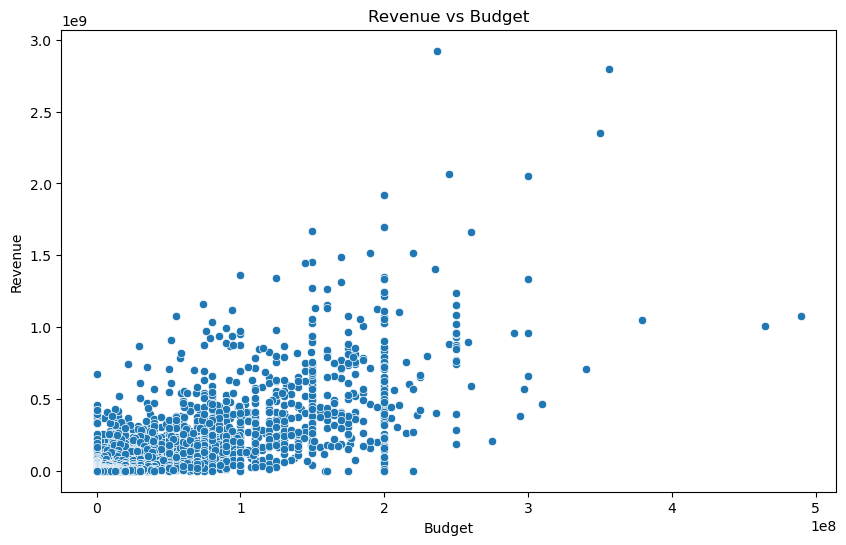

In [6]:
# revenue vs budget
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title('Revenue vs Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

**Key Insights:**
- There is a clear positive relationship between budget and revenue - higher budget movies tend to generate more revenue
- The relationship appears non-linear, with diminishing returns at very high budgets
- Several outliers exist where low-budget movies achieved exceptionally high revenues
- Budget alone is a strong predictor but not sufficient for accurate revenue prediction

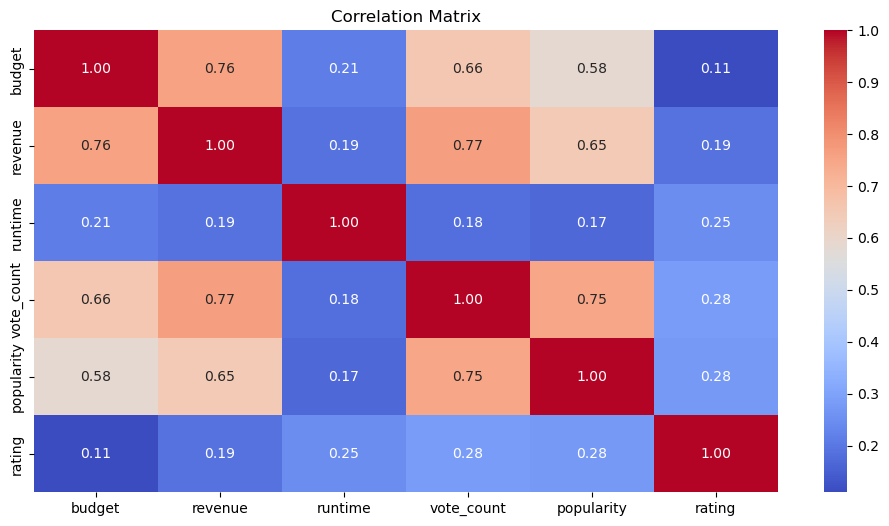

In [7]:
plt.figure(figsize=(12, 6))
num_cols = ['budget', 'revenue', 'runtime', 'vote_count', 'popularity', 'rating']
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Key Insights:**
- Budget shows the strongest positive correlation with revenue, confirming its predictive importance
- Popularity and vote_count also demonstrate moderate positive correlations with revenue
- Runtime has a weak correlation with revenue, suggesting it's a less important predictor
- Rating shows minimal correlation with revenue, indicating critical acclaim doesn't necessarily translate to box office success
- Strong correlations between popularity, vote_count, and revenue suggest audience engagement metrics are valuable features

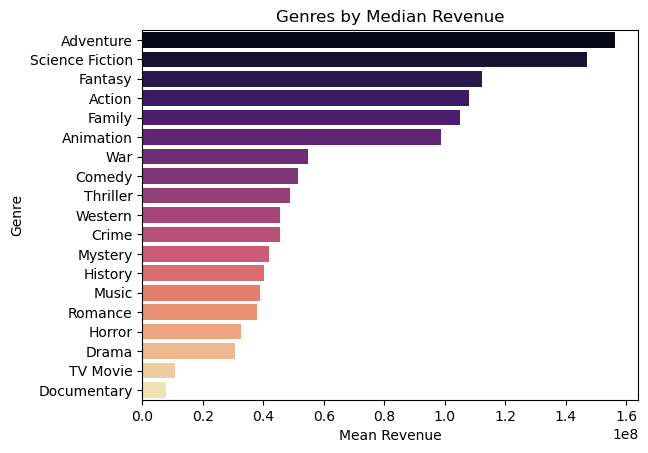

In [8]:
genre_data = []
for index, row in df.iterrows():
    if pd.notna(row['genres']):
        genres = str(row['genres']).split(', ')
        for genre in genres:
            genre_data.append({'genre': genre, 'revenue': row['revenue']})
df_genres = pd.DataFrame(genre_data)
genre_rev = df_genres.groupby('genre')['revenue'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=genre_rev, y='genre', x='revenue', hue='genre', legend=False, palette='magma')
plt.title('Genres by Median Revenue')
plt.xlabel('Mean Revenue')
plt.ylabel('Genre')
plt.show()

**Key Insights:**
- Animation, Adventure, and Science Fiction genres generate the highest average revenues
- Family-friendly genres tend to perform better at the box office
- Niche genres like Documentary and Foreign films show lower average revenues
- Genre is a significant predictor of revenue and should be included as a feature in the model
- Movies can have multiple genres, so multi-label encoding may be necessary

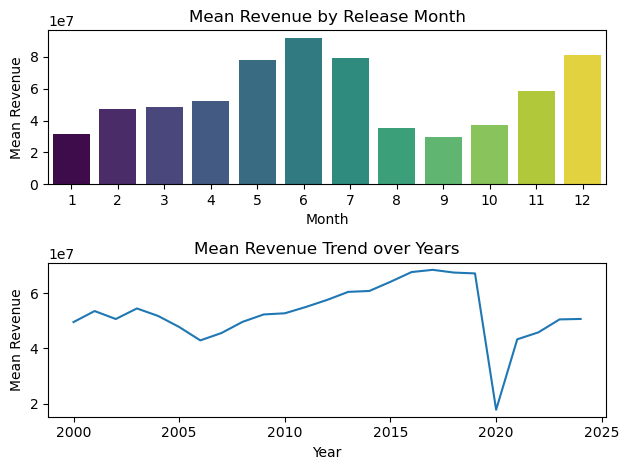

In [9]:
# Convert date
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_month'] = df['release_date'].dt.month
df['release_year'] = df['release_date'].dt.year

# Plot: Average Revenue by Month
plt.subplot(2, 1, 1)
monthly_rev = df.groupby('release_month')['revenue'].mean().reset_index()
sns.barplot(data=monthly_rev, x='release_month', y='revenue', hue='release_month', legend=False, palette='viridis')
plt.title('Mean Revenue by Release Month')
plt.xlabel('Month')
plt.ylabel('Mean Revenue')

# Plot: Revenue over Years (Trend)
plt.subplot(2, 1, 2)
yearly_rev = df.groupby('release_year')['revenue'].mean().reset_index()
sns.lineplot(data=yearly_rev, x='release_year', y='revenue')
plt.title('Mean Revenue Trend over Years')
plt.xlabel('Year')
plt.ylabel('Mean Revenue')
plt.tight_layout()

**Key Insights:**
- Summer months (May-July) and year-end months (November-December) show higher average revenues, likely due to blockbuster releases and holiday seasons
- January and September tend to have lower average revenues, possibly due to fewer major releases
- Revenue has shown an upward trend over the years, with notable increases in recent decades
- This could be due to inflation, higher ticket prices, and increased global market reach
- Release timing is an important factor in revenue prediction and should be considered as a feature